# Time Series Forecasting with Facebook Prophet
**Dataset:** Monthly International Airline Passengers

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

sns.set(style='whitegrid')

## Step 2: Load the Dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## Step 3: Visualize Time Series Data

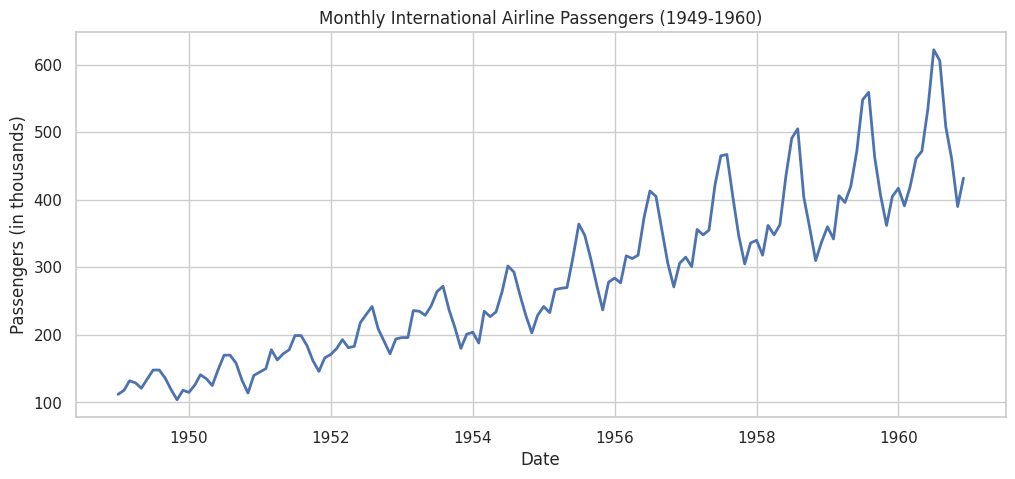

In [9]:
# 3.1 Line Plot of Time Series
plt.figure(figsize=(12, 5))
sns.lineplot(x='ds', y='y', data=df, linewidth=2)
plt.title("Monthly International Airline Passengers (1949-1960)")
plt.xlabel("Date")
plt.ylabel("Passengers (in thousands)")
plt.grid(True)
plt.show()


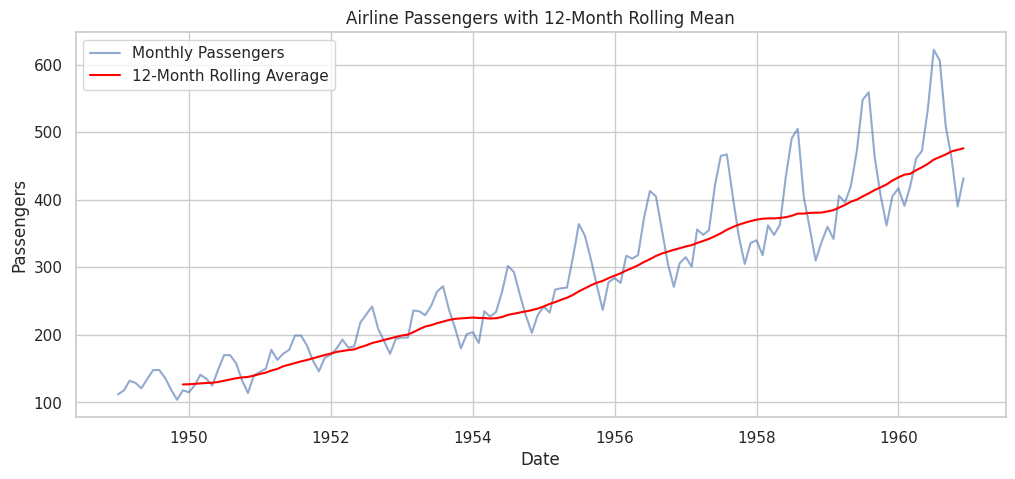

In [10]:
# 3.2 Rolling Average Plot
df['rolling_mean'] = df['y'].rolling(window=12).mean()
plt.figure(figsize=(12, 5))
plt.plot(df['ds'], df['y'], label='Monthly Passengers', alpha=0.6)
plt.plot(df['ds'], df['rolling_mean'], label='12-Month Rolling Average', color='red')
plt.title("Airline Passengers with 12-Month Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()


<ipython-input-11-6efc3f1fb801>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='Blues_d')


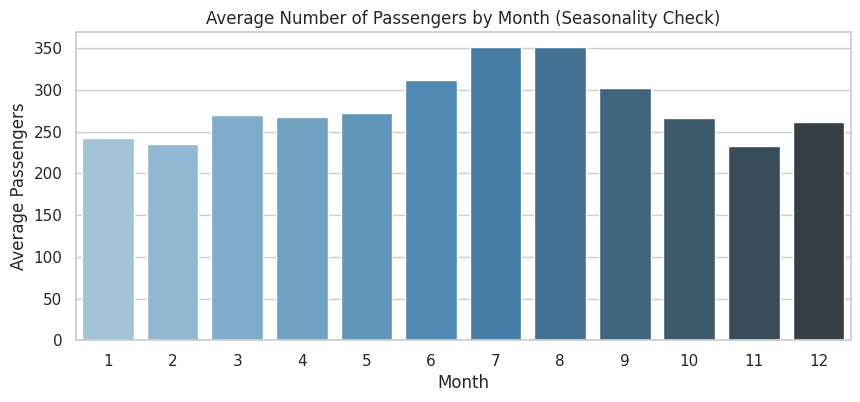

In [11]:
# 3.3 Monthly Average Plot
df['month'] = df['ds'].dt.month
monthly_avg = df.groupby('month')['y'].mean()

plt.figure(figsize=(10, 4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='Blues_d')
plt.title("Average Number of Passengers by Month (Seasonality Check)")
plt.xlabel("Month")
plt.ylabel("Average Passengers")
plt.show()


## Step 4: Initialize and Fit Prophet Model

In [4]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvcr1e89/1vzzcgp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmvcr1e89/rp1z5rl9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24131', 'data', 'file=/tmp/tmpmvcr1e89/1vzzcgp_.json', 'init=/tmp/tmpmvcr1e89/rp1z5rl9.json', 'output', 'file=/tmp/tmpmvcr1e89/prophet_model672tenu3/prophet_model-20250325014008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:40:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:40:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Step 5: Create Future DataFrame and Forecast

In [5]:
future = model.make_future_dataframe(periods=36, freq='M')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
175,1963-07-31,649.339420,620.415055,677.890368
176,1963-08-31,604.903070,578.018469,635.314832
177,1963-09-30,566.670215,538.611194,594.814863
178,1963-10-31,538.990739,508.717607,567.535978
179,1963-11-30,568.380421,538.995873,597.020106


## Step 6: Visualize Forecast

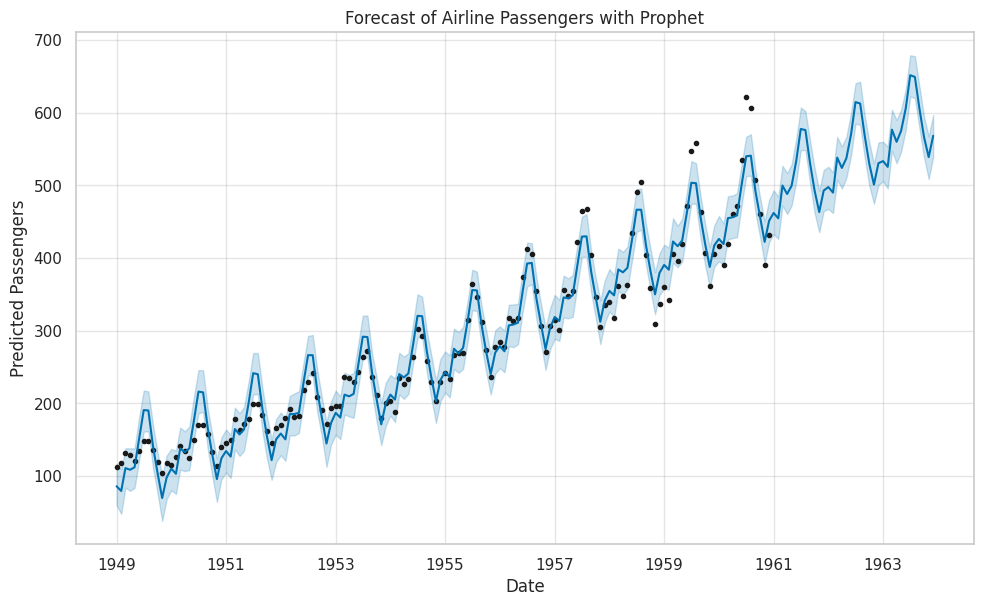

In [6]:
fig1 = model.plot(forecast)
plt.title("Forecast of Airline Passengers with Prophet")
plt.xlabel("Date")
plt.ylabel("Predicted Passengers")
plt.show()

## Step 7: Plot Forecast Components

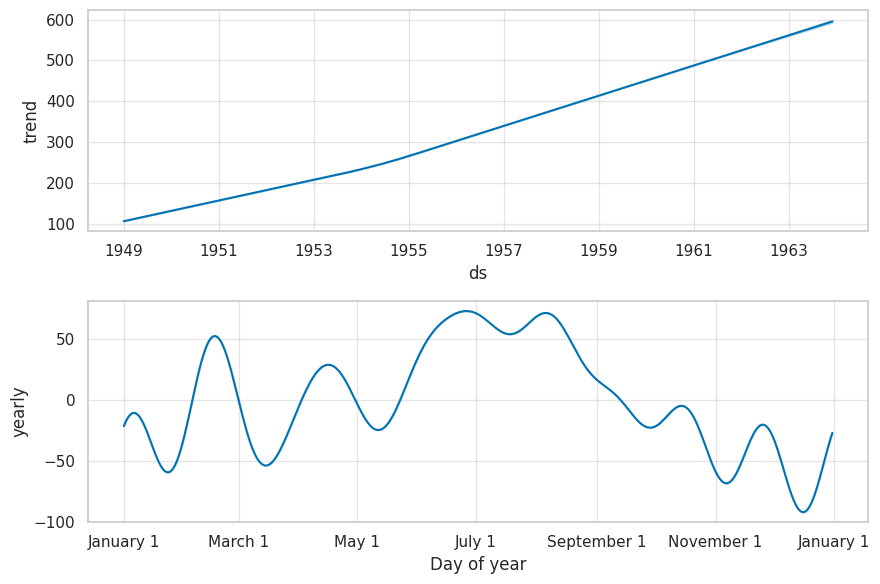

In [7]:
fig2 = model.plot_components(forecast)
plt.show()